# Задачи на 4
## Геом. моделирование
### 1. Найти аффинное преобразование F, переводящее:
1. единичный куб, вписанный в I октант в косой параллелепипед с заданной вершиной O'= F(0) (O' != O), заданной диагональю d и основанием в плоскости Oyz
2. Тетраэдр, отсекающий единичные отрезки на осях, в правильную пирамиду с заданным ребром, центром в точке O' != 0 и основанием Oxy
### 2. Построить поверхность Безье (на свой выбор)
## Геом. поиск
### 3. Найти крайние точки в мн-ве $P_1, P_2,... P_{10} (R^3)$
### 4. Построить евклидово минимальное остовное дерево для N точек на плоскостях (дерево с вершинами в заданных точках и минимальной суммой длин ребер)

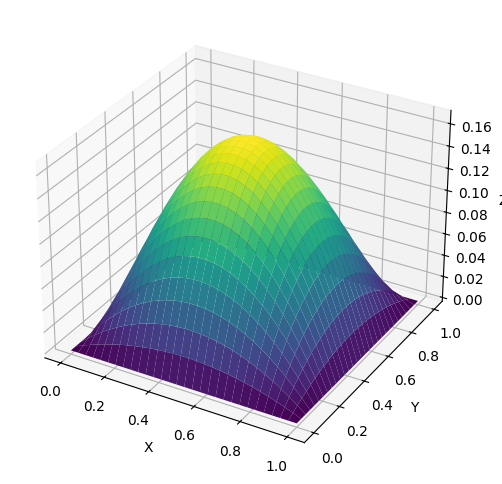

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

binome = lambda n, k: math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
bernstein = lambda n, k, t: binome(n, k) * t**k * (1 - t)**(n - k) # TODO: Отметить точки

control_points = np.array([
    [[0.0, 0.0, 0.0], [0.0, 0.33, 0.0], [0.0, 0.66, 0.0], [0.0, 1.0, 0.0]],
    [[0.33, 0.0, 0.0], [0.33, 0.33, 0.3], [0.33, 0.66, 0.3], [0.33, 1.0, 0.0]],
    [[0.66, 0.0, 0.0], [0.66, 0.33, 0.3], [0.66, 0.66, 0.3], [0.66, 1.0, 0.0]],
    [[1.0, 0.0, 0.0], [1.0, 0.33, 0.0], [1.0, 0.66, 0.0], [1.0, 1.0, 0.0]]
])

def bezier_surface(u, v):
    degree = 3
    surface = np.zeros(u.shape + (3,), dtype=np.float64)
    for i in range(degree + 1):
        for j in range(degree + 1):
            b_i = bernstein(degree, i, u)
            b_j = bernstein(degree, j, v)
            coeff = (b_i * b_j)[:, :, None]
            surface += coeff * control_points[i, j]
    return surface

n = 30
u = np.linspace(0, 1, n)
v = np.linspace(0, 1, n)
u_grid, v_grid = np.meshgrid(u, v)

surface = bezier_surface(u_grid, v_grid)
X = surface[..., 0]
Y = surface[..., 1]
Z = surface[..., 2]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

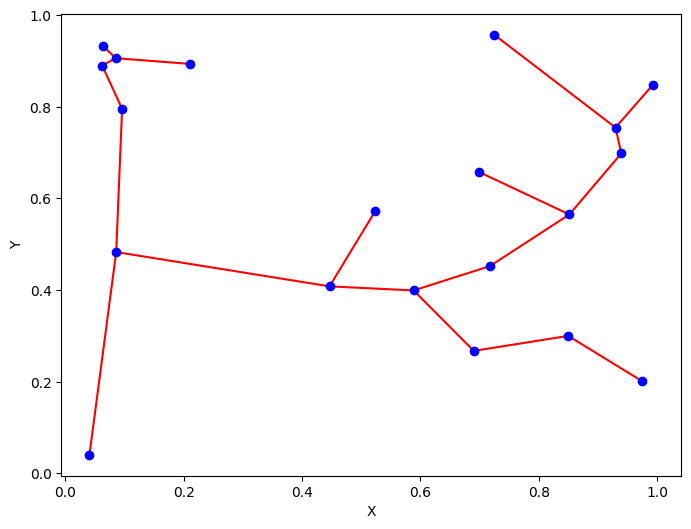

In [7]:
import random
import math
import matplotlib.pyplot as plt

def generate_points(n, x_lim=(0, 1), y_lim=(0, 1)):
    points = [(random.uniform(*x_lim), random.uniform(*y_lim)) for _ in range(n)]
    return points

def euclidean_distance(p, q):
    return math.hypot(p[0] - q[0], p[1] - q[1])

def find(parent, i):
    if parent[i] != i:
        parent[i] = find(parent, parent[i])
    return parent[i]

def union(parent, i, j):
    root_i = find(parent, i)
    root_j = find(parent, j)
    if root_i != root_j:
        parent[root_j] = root_i

def kruskal(points):
    n = len(points)
    edges = []
    for i in range(n):
        for j in range(i+1, n):
            d = euclidean_distance(points[i], points[j])
            edges.append((d, i, j))

    edges.sort(key=lambda x: x[0])

    parent = list(range(n))
    mst_edges = []

    for edge in edges:
        d, i, j = edge
        if find(parent, i) != find(parent, j):
            union(parent, i, j)
            mst_edges.append(edge)

            if len(mst_edges) == n - 1:
                break
    return mst_edges

def plot_mst(points, mst_edges):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', zorder=2)

    for d, i, j in mst_edges:
        x_line = [points[i][0], points[j][0]]
        y_line = [points[i][1], points[j][1]]
        plt.plot(x_line, y_line, color='red', zorder=1)

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

N = 20
points = generate_points(N)
mst_edges = kruskal(points)
plot_mst(points, mst_edges)
